In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from fr_models import utils

In [128]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from fr_models import utils
from fr_models import analytic_models as amd

# class TestMultiCellSSNModel:
#     def test_W(self):
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = 'model_1'
model_config = utils.io.load_data(f'data/{model_name}/a_model_config.pkl')
model_W = utils.io.load_data(f'data/{model_name}/n_model_W.pkl')
W = torch.tensor(model_config['W'])
sigma = torch.tensor(model_config['sigma'])
a_model = amd.GaussianSSNModel(W, sigma, w_dims=model_config['w_dims'], wn_order=11, period=model_config['Ls'])
n_model = a_model.numerical_model(model_config['Ls'], model_config['shape'], device=device)
n_model_W = n_model.W.cpu().detach().numpy()

{'W': array([[ 0.12, -0.4 ],
       [ 0.31, -0.4 ]]), 'sigma': array([[[1.2  ],
        [0.384]],

       [[0.396],
        [0.526]]]), 'r_star': array([0.5, 0.6]), 'Ls': [6.283185307179586], 'shape': (100,), 'w_dims': [0], 'wn_order': 11}


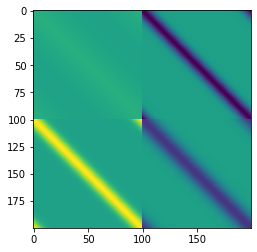

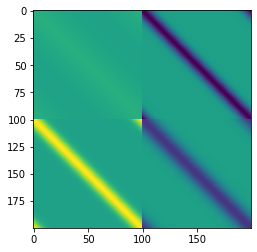

In [118]:
plt.imshow(model_W)
plt.show()
plt.imshow(n_model_W)
plt.show()

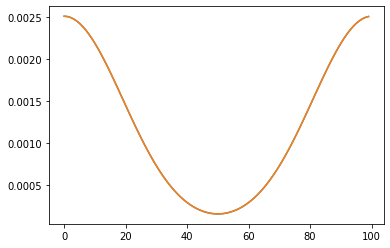

In [127]:
plt.plot(model_W.reshape(2,100,2,100)[0,0,0])
plt.plot(n_model_W.reshape(2,100,2,100)[0,0,0])
plt.show()

In [108]:
print(model_W.reshape(2,100,2,100)[0,0,0])
print(n_model_W.reshape(2,100,2,100)[0,0,0])

0.005703555049828647
0.0057035551281550195


In [55]:
s = 0.5
w = 0.12
dA = 6.0/100
expected = 1/(2*torch.pi*s**2)**0.5*w*np.sum([np.exp(-0.5*(2*np.pi*i)**2/s**2)for i in range(-5,6)])*dA
print(expected)

0.00574476883778063


In [67]:
0.0041/0.06

0.06833333333333334

In [72]:
print(1/(2*torch.pi*s**2)**0.5)

0.7978845608028654


In [133]:
hi = (1,2,3)
hi = torch.tensor(hi)
print(hi.shape)
hi = torch.atleast_2d(hi)
print(hi.shape)

torch.Size([3])
torch.Size([1, 3])
